In [2]:
# import all libraries (ensure all are listed in the environment.yml file)

from IPython.display import display, HTML    # make the screen bigger!
display(HTML(data=""" <style>    div#notebook-container    { width: 85%; }    div#menubar-container    
{ width: 85%; }    div#maintoolbar-container { width: 99%; } </style> """))     

import os
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
import numpy as np

In [18]:
Average_daily_flows

,Date and Time,Fagaalu_CFS,Leone_CFS,Fagasa_CFS,Afono_CFS,Nuuuli_CFS,Vaipito_CFS,Malota_CFS,Fagaitua_CFS
0,2016-03-28,NaN,NaN,NaN,NaN,3.984054,NaN,NaN,NaN
1,2016-03-29,3.775312,NaN,NaN,NaN,7.050918,NaN,NaN,NaN
2,2016-03-30,9.966173,5.114909,2.390563,NaN,12.942051,1.618445,NaN,NaN
3,2016-03-31,1.953906,3.537346,1.202822,NaN,1.811946,2.715485,NaN,NaN
4,2016-04-01,3.436308,3.123194,1.228484,NaN,4.551321,2.890235,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1504,2020-05-10,NaN,-1.454095,NaN,NaN,10.987997,NaN,NaN,NaN
1505,2020-05-11,NaN,-1.572875,NaN,NaN,11.152581,NaN,NaN,NaN
1506,2020-05-12,NaN,-1.769485,NaN,NaN,12.165861,NaN,NaN,NaN
1507,2020-05-13,NaN,-1.933314,NaN,NaN,12.324648,NaN,NaN,NaN


In [19]:
#Load USGS data
USGS_datapath = os.path.join("..",'..', "Raw_data/Stream_gauges/out-of-network-gauges", 'USGS_historical_data.xls')

# Load most recent ASPA UH data
Average_daily_flows = pd.read_csv(os.path.join("..", "..", 'Results', 'Processed_streamflow_data', 'daily', 'ALL_stations_Daily_flow.csv'))
Average_daily_flows['Date and Time'] = pd.to_datetime(Average_daily_flows['Date and Time'], errors='coerce')  # string date to real date

In [15]:
# load data file
Stations = ['9060D','9120D','9175D','9205D','9310D','9315D','9335D','9442D','9480D','9600D','9639D', '9250D']
RawsUSGS = {}

for i in Stations: 
    junkshow = pd.read_excel(USGS_datapath, sheet_name=i,header=1,  index_col=None)  # read  xlsx to memory
    data = junkshow[['M/D/Y','Total Flow (cfs)', 'Base Flow (cfs)', 'Runoff (cfs)' ]]
    data = data.rename(columns={"M/D/Y": "Date",})
    data['Date'] = pd.to_datetime(data['Date'], errors='coerce')  # string date to real date
    data = data.replace(-99.00, np.nan)
    RawsUSGS[i] = data                             # dictionary of streamflow from original perault junkshow excell sheet. 

### At sites gauged by both ASPA-WRRC and USGS, combine the old and streamflow data into one sequence

In [20]:
# merge up Maloata site    Malota_CFS    and      9250D
betty = RawsUSGS['9250D'][['Date', 'Total Flow (cfs)']]
betty  = betty.reset_index(drop=True)
betty = betty.rename(index=str, columns={"Date": 'Date and Time', "Total Flow (cfs)": '9250D_Malota_CFS'})
boop = Average_daily_flows[['Date and Time','Malota_CFS']]
boop = boop.rename(index=str, columns={"Malota_CFS": '9250D_Malota_CFS'})
Malota_CFS = pd.concat([boop, betty])
Malota_CFS = Malota_CFS.sort_values('Date and Time')       # sort by date

# merge up Leone site    Leone_CFS     and     9335D          
betty = RawsUSGS['9335D'][['Date', 'Total Flow (cfs)']]
betty  = betty.reset_index(drop=True)
betty = betty.rename(index=str, columns={"Date": 'Date and Time', "Total Flow (cfs)": '9335D_Leone_CFS'})
boop = Average_daily_flows[['Date and Time','Leone_CFS']]
boop = boop.rename(index=str, columns={"Leone_CFS": '9335D_Leone_CFS'})
Leone_CFS = pd.concat([boop, betty])
Leone_CFS = Leone_CFS.sort_values('Date and Time')       # sort by date

# merge up Nuuuli_CFS site     Nuuuli_CFS    and      9442D
betty = RawsUSGS['9442D'][['Date', 'Total Flow (cfs)']]
betty  = betty.reset_index(drop=True)
betty = betty.rename(index=str, columns={"Date": 'Date and Time', "Total Flow (cfs)": '9442D_Nuuuli_CFS'})
boop = Average_daily_flows[['Date and Time','Nuuuli_CFS']]
boop = boop.rename(index=str, columns={"Nuuuli_CFS": '9442D_Nuuuli_CFS'})
Nuuuli_CFS = pd.concat([boop, betty])
Nuuuli_CFS = Nuuuli_CFS.sort_values('Date and Time')       # sort by date

# merge up Fagasa_CFS site     Fagasa_CFS    and      9175D
betty = RawsUSGS['9175D'][['Date', 'Total Flow (cfs)']]
betty  = betty.reset_index(drop=True)
betty = betty.rename(index=str, columns={"Date": 'Date and Time', "Total Flow (cfs)": '9175D_Fagasa_CFS'})
boop = Average_daily_flows[['Date and Time','Fagasa_CFS']]
boop = boop.rename(index=str, columns={"Fagasa_CFS": '9175D_Fagasa_CFS'})
Fagasa_CFS = pd.concat([boop, betty])
Fagasa_CFS = Fagasa_CFS.sort_values('Date and Time')       # sort by date

# merge up Afono_CFS site     Afono_CFS    and      9120D
betty = RawsUSGS['9120D'][['Date', 'Total Flow (cfs)']]
betty  = betty.reset_index(drop=True)
betty = betty.rename(index=str, columns={"Date": 'Date and Time', "Total Flow (cfs)": '9120D_Afono_CFS'})
boop = Average_daily_flows[['Date and Time','Afono_CFS']]
boop = boop.rename(index=str, columns={"Afono_CFS": '9120D_Afono_CFS'})
Afono_CFS = pd.concat([boop, betty])
Afono_CFS = Afono_CFS.sort_values('Date and Time')       # sort by date


# now concatnate all the sites into the consolidated frame
Consolidated_daily_flows = Average_daily_flows.copy()
Consolidated_daily_flows = Consolidated_daily_flows.merge(Malota_CFS, how='outer', on='Date and Time')
Consolidated_daily_flows = Consolidated_daily_flows.merge(Leone_CFS, how='outer', on='Date and Time')
Consolidated_daily_flows = Consolidated_daily_flows.merge(Nuuuli_CFS, how='outer', on='Date and Time')
Consolidated_daily_flows = Consolidated_daily_flows.merge(Fagasa_CFS, how='outer', on='Date and Time')
Consolidated_daily_flows = Consolidated_daily_flows.merge(Afono_CFS, how='outer', on='Date and Time')

del Consolidated_daily_flows['Malota_CFS'] 
del Consolidated_daily_flows['Leone_CFS'] 
del Consolidated_daily_flows['Nuuuli_CFS'] 
del Consolidated_daily_flows['Fagasa_CFS'] 
del Consolidated_daily_flows['Afono_CFS'] 

Consolidated_daily_flows = Consolidated_daily_flows.sort_values('Date and Time')       # sort by date

# now stick on the perault data from the Raws data in memory above
not_overlapping_USGS_sites = ['9060D', '9205D', '9310D', '9315D', '9480D', '9600D', '9639D']

for i in not_overlapping_USGS_sites: 
    astro = RawsUSGS[i][['Date', 'Total Flow (cfs)']]
    astro = astro.reset_index(drop=True)
    keynam = i+"_CFS"
    astro = astro.rename(index=str, columns={"Date": 'Date and Time',  'Total Flow (cfs)': keynam})
    Consolidated_daily_flows = Consolidated_daily_flows.merge(astro, how='outer', on='Date and Time')

Consolidated_daily_flows = Consolidated_daily_flows.sort_values('Date and Time')       # sort by date
Consolidated_daily_flows = Consolidated_daily_flows.reset_index(drop=True)

### Baseflow separation

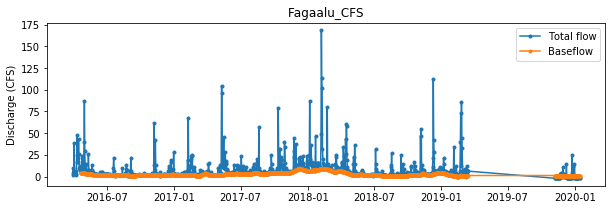

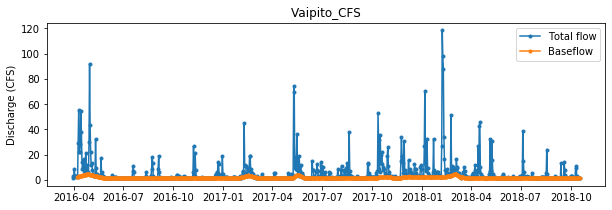

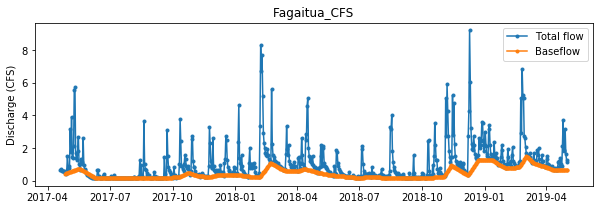

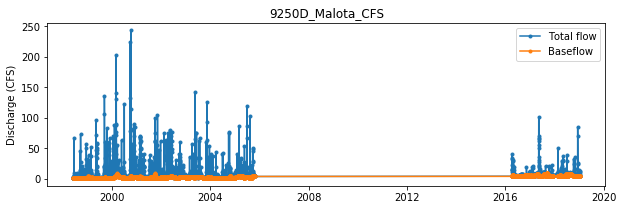

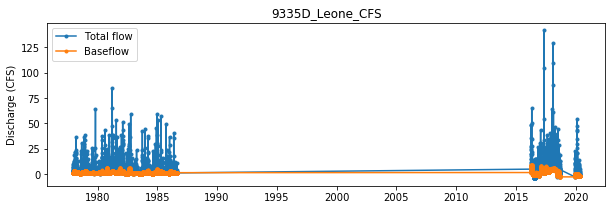

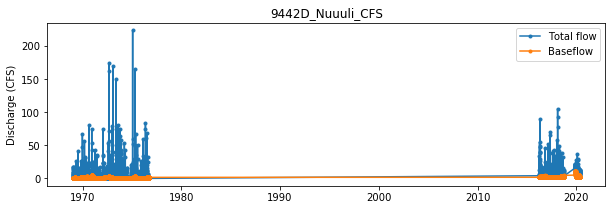

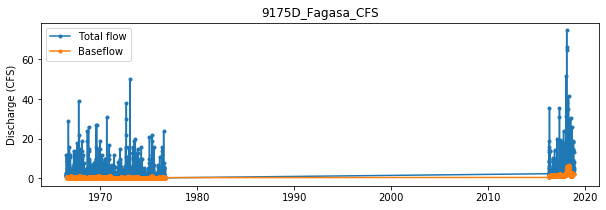

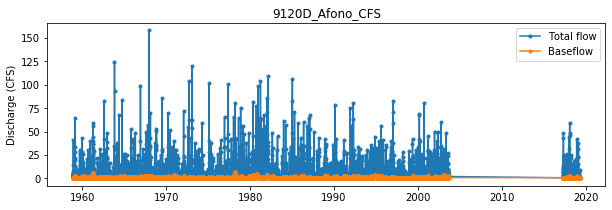

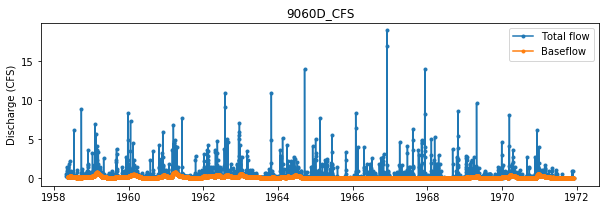

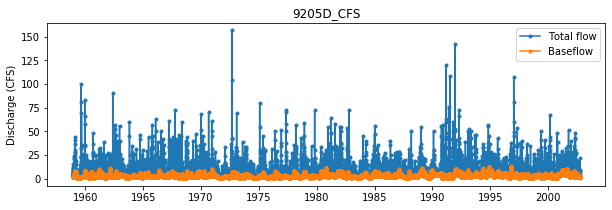

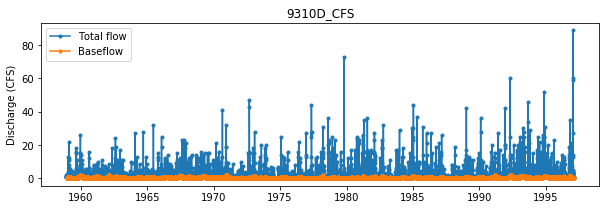

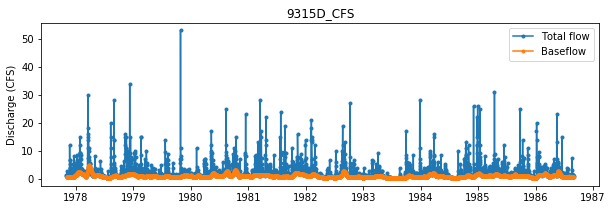

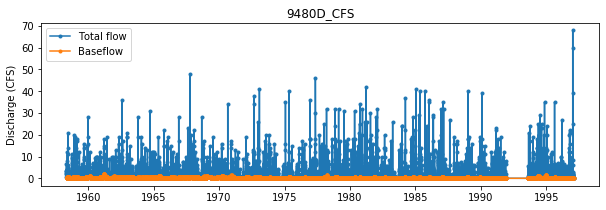

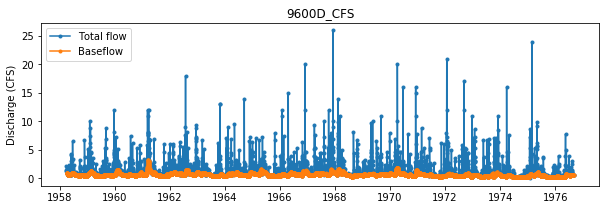

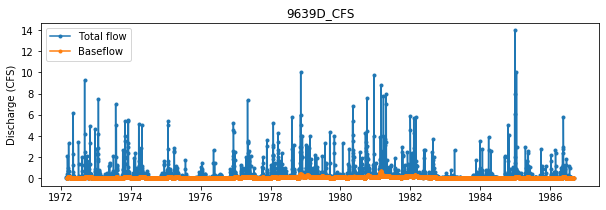

In [21]:
plt.close("all")  # close previous figures to clear memory

station_list = list(Consolidated_daily_flows.columns[1:])

N = 5                     # averaging window, number of days
tp_test_factor = 0.9      # turning point test factor     (If 90 percent of a given minimum (the “turning point test factor”) is less than both adjacent minimums, then that minimum is a turning point.)

All_ALL_ALL_stations = {}                                                                           # eill be final processed dictionary of dataframes
Site=[]; SumTotal=[]; SumBF=[]; SumRO=[]; AveTotal=[]; AveBF=[]; AveRO=[]; BFTF=[]; ROTF=[]  # lists for sumary dataframe

for stato in station_list:
    mean_dates = []; mins = []; means = []
    
# use this to cut out any missing sections in each series
    framo = Consolidated_daily_flows[['Date and Time', stato]]
    mask = ~np.isnan(framo[stato])
    masked_frame = framo[mask]
    masked_frame = masked_frame.reset_index(drop=True)
    
    for i in range(1,len(masked_frame['Date and Time'])-N,N):                         # Baseflow separation code from Mike
        N_day_data = []
        for j in range(0,N-1):
            N_day_data.append(float(masked_frame[stato][i+j]))
        mean_dates.append(masked_frame['Date and Time'][i+(N//2)])
        mean_point = [masked_frame['Date and Time'][i+(N//2)]]
        N_day_mean = np.mean(N_day_data)
        mean_point.append(N_day_mean)
        means.append(mean_point)
        min_point = [masked_frame['Date and Time'][i+(N//2)]]
        N_day_min = np.min(N_day_data)
        min_point.append(N_day_min)
        mins.append(min_point)

    turning_points = []; tp_dates = []; tp_flow = []; sf_dates = []; sf_flow = [];     # mikes code, still not sure I understand it all
    for i in range(0,len(mins)-1,1):
        if (tp_test_factor*(mins[i][1]))<mins[i+1][1] and (tp_test_factor*(mins[i][1]))<mins[i-1][1]:
            turning_points.append(mins[i])
            tp_dates.append(mins[i][0])
            tp_flow.append(mins[i][1])

    Total_flows = pd.DataFrame({'Date': masked_frame['Date and Time'], 'Total_flow_CFS': masked_frame[stato] })
    Baseflows = pd.DataFrame({'Date': tp_dates, 'Base_flow_CFS': tp_flow })  
    All_flows = Total_flows.merge(Baseflows, how='outer', on='Date')                     # final dataframe with separated values of flow
    All_flows['Base_flow_CFS'].interpolate(inplace=True)                                 # baseflows were only calculated at turning points. here linearly interpolate to give a value for each day
    All_flows['Runoff_CFS'] = All_flows['Total_flow_CFS'] - All_flows['Base_flow_CFS']
    All_flows['Runoff_CFS'] = All_flows['Runoff_CFS'].clip(lower=0)    # convert any negative runoff values to zero
    
    All_ALL_ALL_stations[stato] = All_flows                      # create final dictionary                            
    
    # create a summary dataframe for comparison
    Site.append(stato); SumTotal.append(All_flows['Total_flow_CFS'].sum()); SumBF.append(All_flows['Base_flow_CFS'].sum()); SumRO.append(All_flows['Total_flow_CFS'].sum()-All_flows['Base_flow_CFS'].sum())
    AveTotal.append(All_flows['Total_flow_CFS'].mean()); AveBF.append(All_flows['Base_flow_CFS'].mean()); AveRO.append(All_flows['Total_flow_CFS'].mean()-All_flows['Base_flow_CFS'].mean())
    BFTF.append(100*(All_flows['Base_flow_CFS'].mean()/All_flows['Total_flow_CFS'].mean()))
    
    # plot stuff
    fig, ax = plt.subplots(figsize=(10, 3))
    ax.plot(All_flows['Date'],All_flows['Total_flow_CFS'], '-',label='Total flow', marker='.')
    ax.plot(All_flows['Date'],All_flows['Base_flow_CFS'], '-',label='Baseflow', marker='.')
    ax.set_title(stato)
    ax.legend()
    plt.ylabel('Discharge (CFS)')
    
# create the summary dataframe for comparison
Annual_stats_all_all_all = pd.DataFrame({'Site':Site,'Ave Total':AveTotal,'AveBF':AveBF,'Ave RO':AveRO,'BF:TF':BFTF})


In [31]:
# Create outputs
Annual_stats_all_all_all.to_csv(os.path.join("..", "..", 'Results', 'Processed_streamflow_data', 'with_USGS_data', 'Annual_ave_flows_wUSGS_CFS.csv'), index=False)

for i in All_ALL_ALL_stations.keys():
    All_ALL_ALL_stations[i].to_csv(os.path.join("..", "..", 'Results', 'Processed_streamflow_data', 'with_USGS_data', f"Daily_CFS_wUSGS_{i}.csv"))

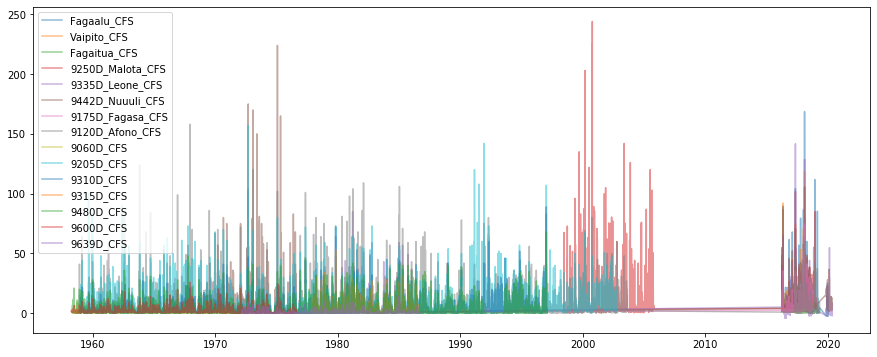

In [37]:
#plot all our stations
fig = plt.figure(figsize=(15, 6))
ax1 = plt.axes()
for t in All_ALL_ALL_stations.keys(): 
        ax1.plot(All_ALL_ALL_stations[t]['Date'], All_ALL_ALL_stations[t]['Total_flow_CFS'], alpha = .5, marker='', label=t )
        plt.legend()

### Summarize and print out runoff data to a CSV for use in the Tutuila water budget model
(https://github.com/cshuler/Tutuila-SWB-Scenarios)

In [23]:
# Consolidate by a dictionary of stations {Station_stats} with an entry for each month
Station_stats ={}

Stations = All_ALL_ALL_stations.keys()

for stato in Stations:
    All_ALL_ALL_stations[stato]['Month'] = All_ALL_ALL_stations[stato]['Date'].apply(lambda i: i.month)
    M = []; TF_sum = []; BF_sum =[]; RO_sum = []
    for i in All_ALL_ALL_stations[stato]['Month'].unique():
        a = All_ALL_ALL_stations[stato][All_ALL_ALL_stations[stato]['Month'] == i]
        tf = a['Total_flow_CFS'].mean()
        bf = a['Base_flow_CFS'].mean()
        ro = a['Runoff_CFS'].mean()
        M.append(i); TF_sum.append(tf); BF_sum.append(bf); RO_sum.append(ro)
    temp_frame  = pd.DataFrame({'Month':M,'Total_flow':TF_sum,'Baseflow':BF_sum, 'Runoff':RO_sum,})
    temp_frame['BF:TF'] = temp_frame['Baseflow']/temp_frame['Total_flow']
    temp_frame['Site'] = stato
    Station_stats[stato] = temp_frame
    
    
# Consolidate by a dictionary of months  {Monthly_stats} with an entry for each station
Monthly_stats = {}
month_key = {1:'month_01',  2:'month_02',  3:'month_03',  4:'month_04',  5:'month_05',  6:'month_06',  7:'month_07',  8:'month_08',  9:'month_09',  10:'month_10',  11:'month_11',  12:'month_12'}
for m in range(1,13):
    mogo = pd.DataFrame()
    for s in Stations:
        lineo = Station_stats[s][Station_stats[s]['Month'] == m]
        mogo = pd.concat([mogo, lineo], axis=0)
    Monthly_stats[month_key[m]] = mogo
    
    
Calculated_runoff_by_month = pd.DataFrame({'Site':Monthly_stats['month_04']["Site"]})    # make blank data frame to merge onto 
ZID_list = [163,133,272,47,73,125,118,236,307,85,48,63,168,241,342]

for i in Monthly_stats.keys():
    dframe = Monthly_stats[i][['Site', 'Runoff']].copy()
    Col_nam = i+"_RO_m3pd"
    dframe[Col_nam] = dframe['Runoff'].apply(lambda x: (x*0.0283168)*86400)  # this is tha actual calculation to get m3/d of precip from the zone sum
    del dframe['Runoff']
    Calculated_runoff_by_month = Calculated_runoff_by_month.merge(dframe, how='outer', on='Site')

Calculated_runoff_by_month['Zone_ID'] = ZID_list    

Ave_list = []
for k in range(0,15):
    Row_ave = Calculated_runoff_by_month.iloc[k].loc['month_01_RO_m3pd':'month_12_RO_m3pd'].mean()
    Ave_list.append(Row_ave)
    
# Calculated_runoff_by_month['month_14_RO_m3pd'] = Ave_list   # of for somereason you want the annual average
    
Calculated_runoff_by_month.to_csv(os.path.join("..", "..", 'Results', 'Processed_streamflow_data', 'for_WB_model', 'Raw_RO_data_Measured.csv'), index=False)